In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#leitura dos arquivos
df_aracaju = pd.read_excel("data/aracaju.xlsx")
df_aracaju.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df_fortaleza = pd.read_excel("data/fortaleza.xlsx")
df_fortaleza.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [6]:
df_natal = pd.read_excel("data/natal.xlsx")
df_natal.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.0,853,2
1,Natal,2018-11-25,563.0,853,2
2,Natal,2019-03-11,308.0,852,3
3,Natal,2019-01-07,271.0,854,3
4,Natal,2019-03-09,699.0,853,3


In [7]:
df_recife = pd.read_excel("data/recife.xlsx")
df_recife.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Recife,2019-01-01,162.61,981,1
1,Recife,2019-01-01,11.44,983,1
2,Recife,2019-02-10,12.94,983,5
3,Recife,2019-02-10,160.54,981,3
4,Recife,2019-02-14,19.89,983,7


In [8]:
df_salvador = pd.read_excel("data/salvador.xlsx")
df_salvador.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [9]:
# unindo os arquivos
df = pd.concat([df_aracaju, df_fortaleza, df_natal, df_recife, df_salvador])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [15]:
df.columns

Index(['Cidade', 'Data', 'Vendas', 'LojaID', 'Qtde'], dtype='object')

In [16]:
df = df.rename(
    columns={
        "Cidade":"cidade",
        "Data":"data",
        "Vendas":"vendas",
        "LojaID":"idDaLoja",
        "Qtde":"qtd"
    })

df.head()

,cidade,data,vendas,idDaLoja,qtd
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [10]:
df.describe()

,Vendas,LojaID,Qtde
count,894.000000,894.000000,894.000000
mean,122.611801,1074.844519,3.261745
std,166.818723,191.360735,2.096964
min,3.010000,852.000000,1.000000
25%,22.380000,983.000000,2.000000
50%,44.000000,1035.000000,3.000000
75%,160.925000,1037.000000,4.000000
max,886.000000,1523.000000,10.000000


In [19]:
df.dtypes

cidade              object
data        datetime64[ns]
vendas             float64
idDaLoja             int64
qtd                  int64
dtype: object

In [17]:
df["cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: cidade, dtype: int64

In [21]:
df.isnull().sum()

cidade      0
data        0
vendas      0
idDaLoja    0
qtd         0
dtype: int64

In [22]:
# criando coluna de receitas
df["receita"] = df["vendas"].mul(df["qtd"])
df.head()

,cidade,data,vendas,idDaLoja,qtd,receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [23]:
# retornando a maior receita
df["receita"].max()

3544.0

In [24]:
# retornando a menor receita
df["receita"].min()

3.34

In [25]:
# retornando as três maiores receitas
df.nlargest(3, "receita")

,cidade,data,vendas,idDaLoja,qtd,receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [26]:
# retornando as três menores receitas
df.nsmallest(3, "receita")

,cidade,data,vendas,idDaLoja,qtd,receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [27]:
# agrupando por cidade
df.groupby("cidade")["receita"].sum()

cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: receita, dtype: float64

In [28]:
# retornando as dez maiores receitas
df.sort_values("receita", ascending=False).head(10)

,cidade,data,vendas,idDaLoja,qtd,receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [29]:
# trabalhando com datas

# agrupando por ano
df.groupby(df["data"].dt.year)["receita"].sum()

data
2018    118176.53
2019    228246.45
Name: receita, dtype: float64

In [37]:
# criando coluna com o ano
df["ano_venda"] = df["data"].dt.year

df.sample(5)

,cidade,data,vendas,idDaLoja,qtd,receita,ano_venda,mes_venda,dia_venda,diferenca_dias
184,Natal,2019-01-02,167.16,1037,1,167.16,2019,1,2,366 days
17,Fortaleza,2019-01-01,166.80,1004,1,166.80,2019,1,1,365 days
73,Aracaju,2018-01-01,159.78,1521,3,479.34,2018,1,1,0 days
1,Natal,2018-11-25,563.00,853,2,1126.00,2018,11,25,328 days
27,Aracaju,2018-01-01,3.39,1523,4,13.56,2018,1,1,0 days


In [41]:
# extraindo mês e dia
df["mes_venda"], df["dia_venda"] = (df["data"].dt.month, df["data"].dt.day)

df.sample(5)

,cidade,data,vendas,idDaLoja,qtd,receita,ano_venda,mes_venda,dia_venda,diferenca_dias
77,Natal,2019-04-01,426.00,853,3,1278.00,2019,4,1,455 days
24,Salvador,2019-01-01,15.60,1034,2,31.20,2019,1,1,365 days
211,Natal,2019-01-02,141.05,1035,3,423.15,2019,1,2,366 days
37,Recife,2019-01-01,136.36,980,7,954.52,2019,1,1,365 days
51,Recife,2019-01-01,146.95,982,2,293.90,2019,1,1,365 days


In [39]:
# retornando a data mais antiga
df["data"].min()

Timestamp('2018-01-01 00:00:00')

In [40]:
# calculando a diferença de dias entre datas
df["diferenca_dias"] = df["data"] - df["data"].min()

df.sample(5)

,cidade,data,vendas,idDaLoja,qtd,receita,ano_venda,mes_venda,dia_venda,diferenca_dias
122,Recife,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days
67,Natal,2019-02-14,379.00,852,2,758.00,2019,2,14,409 days
120,Aracaju,2018-01-01,7.73,1520,10,77.30,2018,1,1,0 days
101,Salvador,2019-01-01,32.28,1035,3,96.84,2019,1,1,365 days
185,Salvador,2019-01-02,6.67,1036,1,6.67,2019,1,2,366 days


In [43]:
# criando coluna trimestre
df["trimestre_venda"] = df["data"].dt.quarter

df.sample(5)

,cidade,data,vendas,idDaLoja,qtd,receita,ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
58,Fortaleza,2019-01-01,38.90,1004,4,155.60,2019,1,1,365 days,1
106,Recife,2019-01-01,30.46,982,3,91.38,2019,1,1,365 days,1
12,Aracaju,2019-01-01,9.78,1520,8,78.24,2019,1,1,365 days,1
114,Aracaju,2018-01-01,10.17,1520,5,50.85,2018,1,1,0 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1


In [44]:
# filtrando vendas de um mês específico
vendas_marco_19 = df.loc[
    (df["data"].dt.year==2019) &
    (df["data"].dt.month==3)
]

vendas_marco_19

,cidade,data,vendas,idDaLoja,qtd,receita,ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [45]:
# visualização de dados

In [46]:
# número de vendas por loja
df["idDaLoja"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: idDaLoja, dtype: int64

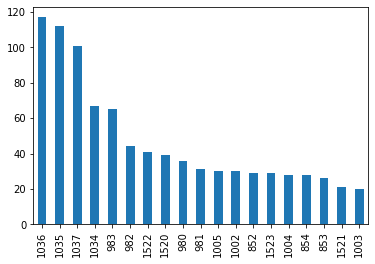

In [51]:
# gráfico de barras
df["idDaLoja"].value_counts(ascending=False).plot.bar();

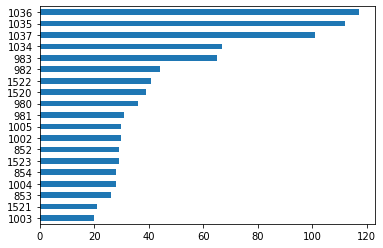

In [50]:
# gráfico de barras horizontal
df["idDaLoja"].value_counts(ascending=True).plot.barh();

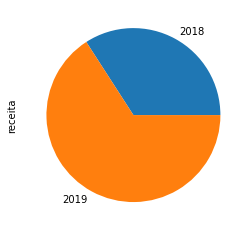

In [53]:
# gráfico de pizza
df.groupby(df["data"].dt.year)["receita"].sum().plot.pie();

In [54]:
# total de vendas por cidade
df["cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: cidade, dtype: int64

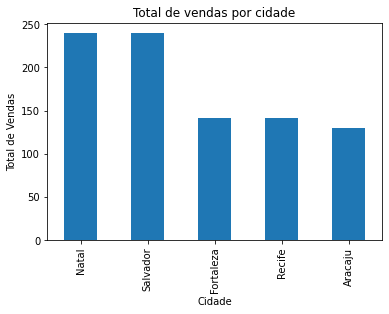

In [59]:
# aducionando título e alterando nome dos eixos
df["cidade"].value_counts().plot.bar(title="Total de vendas por cidade");
plt.xlabel("Cidade");
plt.ylabel("Total de Vendas");

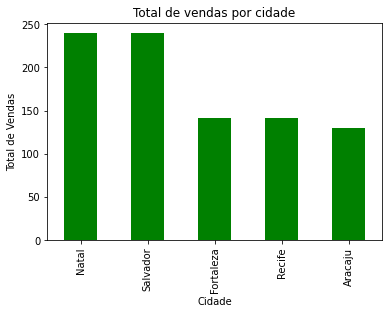

In [61]:
# alterando a cor
df["cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="green");
plt.xlabel("Cidade");
plt.ylabel("Total de Vendas");

In [62]:
# alterando o estilo
plt.style.use("ggplot")

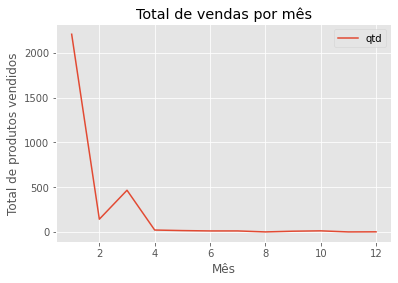

In [65]:
# total de vendas por mês
df.groupby(df["mes_venda"])["qtd"].sum().plot(title="Total de vendas por mês");
plt.xlabel("Mês");
plt.ylabel("Total de produtos vendidos");
plt.legend();

In [67]:
df.groupby(df["mes_venda"])["qtd"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: qtd, dtype: int64

In [68]:
# selecionando apenas o ano de 2019
df_2019 = df[df["ano_venda"]==2019]

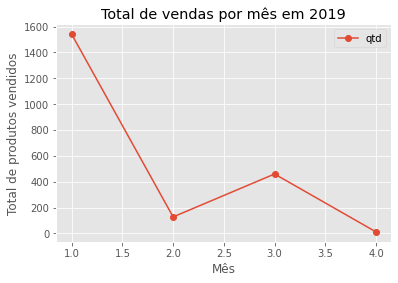

In [72]:
# total de produtos vendidos por mês em 2019
df_2019.groupby(df_2019["mes_venda"])["qtd"].sum().plot(title="Total de vendas por mês em 2019", marker="o");
plt.xlabel("Mês");
plt.ylabel("Total de produtos vendidos");
plt.legend();

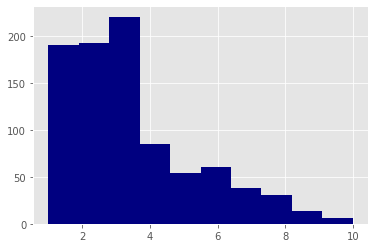

In [78]:
# histograma
plt.hist(df["qtd"], color="navy");

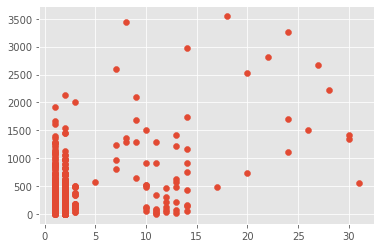

In [79]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["receita"]);

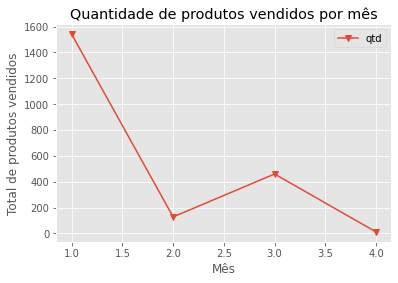

In [80]:
# salvando em png
df_2019.groupby(df_2019["mes_venda"])["qtd"].sum().plot(marker="v");
plt.title("Quantidade de produtos vendidos por mês");
plt.xlabel("Mês");
plt.ylabel("Total de produtos vendidos");
plt.legend();
plt.savefig("grafico_qtd_x_mes.png");